In [ ]:
%cd /content

!curl -L "https://app.roboflow.com/ds/UiqDTNZRQd?key=6cWES62jpR" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

%mkdir dataset
%mv test dataset
%mv train dataset
%mv valid dataset
%mv data.yaml dataset

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

%cd /content/yolov5/
!pip install -r requirements.txt

In [3]:
%cd /
from glob import glob

train_list = glob('/content/dataset/train/images/*.jpg')

print(len(train_list))

/
1551


In [4]:
%cd /
from glob import glob

val_list = glob('/content/dataset/valid/images/*.jpg')

print(len(val_list))

/
147


In [5]:
# from sklearn.model_selection import train_test_split
# train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)

# print(len(train_img_list), len(val_img_list))

In [6]:
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_list) + '\n')

with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(val_list) + '\n')

In [7]:
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
    data = yaml.full_load(f)

print(data)

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 25, 'names': ['balenciaga', 'black', 'blue', 'brown', 'coach', 'galaxy', 'gold', 'gray', 'green', 'gucci', 'iphone', 'ivory', 'louisvuitton', 'mint', 'navy', 'orange', 'pink', 'purple', 'red', 'silver', 'skyblue', 'violet', 'wallet', 'white', 'yellow'], 'roboflow': {'workspace': 'sunmoon-university', 'project': 'big-project', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/sunmoon-university/big-project/dataset/1'}}
{'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt', 'test': '../test/images', 'nc': 25, 'names': ['balenciaga', 'black', 'blue', 'brown', 'coach', 'galaxy', 'gold', 'gray', 'green', 'gucci', 'iphone', 'ivory', 'louisvuitton', 'mint', 'navy', 'orange', 'pink', 'purple', 'red', 'silver', 'skyblue', 'violet', 'wallet', 'white', 'yellow'], 'roboflow': {'workspace': 'sunmoon-university', 'project': 'big-project', 'version': 1, 'license': 'CC B

In [ ]:
%cd /content/yolov5/

!python /content/yolov5/train.py --img 640 --batch 16 --epochs 100 --data /content/dataset/data.yaml --weights yolov5x.pt --name result_bong --cfg /content/yolov5/models/yolov5x.yaml

/content/yolov5
train: weights=yolov5x.pt, cfg=/content/yolov5/models/yolov5x.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=result_bong, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-30-g342fe05 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, 

In [ ]:
!cp -r /content/yolov5/runs/train/result_bong /content/drive/MyDrive/models

In [ ]:
!python /content/yolov5/detect.py --weights /content/drive/MyDrive/models/result_bong/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/img/test3.png

detect: weights=['/content/drive/MyDrive/models/result_bong/weights/best.pt'], source=/content/drive/MyDrive/img/test3.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-30-g342fe05 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5x summary: 322 layers, 86334910 parameters, 0 gradients, 204.3 GFLOPs
image 1/1 /content/drive/MyDrive/img/test3.png: 640x448 1 iphone, 72.6ms
Speed: 0.6ms pre-process, 72.6ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


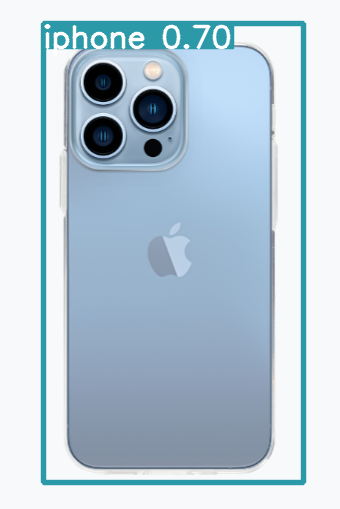

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/yolov5/runs/detect/exp4/test3.png')
cv2_imshow(img)